# Parameters tuning

Kernel parameters selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane. We'll focus on the two last ones in this section.

Let's now carry on with a bigger dataset and try with different values of the parameters and try normalization.


In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import  Normalizer

gt = pd.read_csv('../../dumps/references/2020.02.10-12.14.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)
scaler = Normalizer()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

## Gamma

The *gamma* parameter controls the width of the Gaussian kernel. It determines the scale of what it means for points to be close together. The higher the gamma value it tries to exactly fit the training data set.

In [3]:
gammas = [0.1, 1, 10, 100]
for i in gammas:
    print("min_samples_split set to %s" % i)
    svc = SVC(kernel='rbf', gamma=i)
    svc.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(svc.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(svc.score(data_test, target_test)))

min_samples_split set to 0.1
Accuracy on training set: 0.895
Accuracy on test set: 0.900
min_samples_split set to 1
Accuracy on training set: 0.895
Accuracy on test set: 0.900
min_samples_split set to 10
Accuracy on training set: 0.933
Accuracy on test set: 0.904
min_samples_split set to 100
Accuracy on training set: 0.971
Accuracy on test set: 0.913


Looks like we get better results with a gamma value of 100.

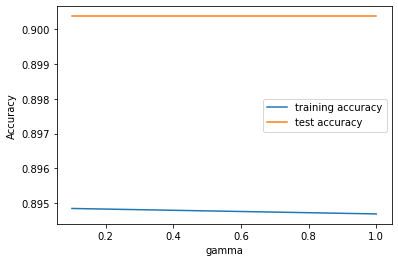

In [4]:
training_accuracy = [] 
test_accuracy = []
gammas = [0.1, 1]
for v in gammas:
    clf = SVC(kernel='rbf', gamma=v) 
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(gammas, training_accuracy, label="training accuracy") 
plt.plot(gammas, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("gamma")
plt.legend()

## C

The *C* parameter is a regularization parameter, similar to that used in the linear models. It limits the importance of each point.

In [5]:
c_values = [0.1, 1, 10, 100, 1000]
for i in c_values:
    print("min_samples_split set to %s" % i)
    svc = SVC(kernel='rbf', C=i)
    svc.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(svc.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(svc.score(data_test, target_test)))

min_samples_split set to 0.1
Accuracy on training set: 0.895
Accuracy on test set: 0.900
min_samples_split set to 1
Accuracy on training set: 0.895
Accuracy on test set: 0.900
min_samples_split set to 10
Accuracy on training set: 0.943
Accuracy on test set: 0.892
min_samples_split set to 100
Accuracy on training set: 0.962
Accuracy on test set: 0.868
min_samples_split set to 1000
Accuracy on training set: 0.973
Accuracy on test set: 0.852


Better results are acquired with smaller C values for the test set.

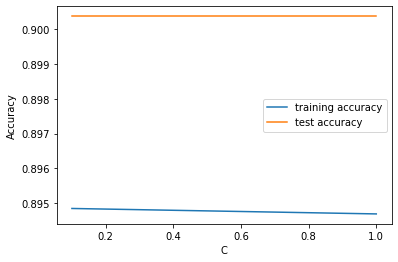

In [6]:
training_accuracy = [] 
test_accuracy = []
c_values = [0.1, 1]
for v in c_values:
    clf = SVC(kernel='rbf', C=v) 
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(c_values, training_accuracy, label="training accuracy") 
plt.plot(c_values, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

## Degree

*degree* is a parameter used when kernel is set to ‘poly’. It’s basically the degree of the polynomial used to find the hyperplane to split the data.

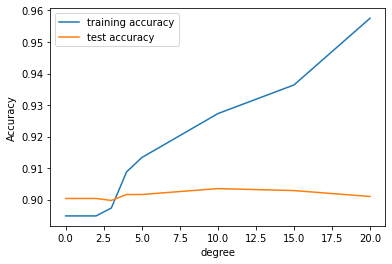

In [7]:
training_accuracy = [] 
test_accuracy = []
degrees = [0, 1, 2, 3, 4, 5, 10,15,20]
for v in degrees:
    clf = SVC(kernel='poly', degree=v) 
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(degrees, training_accuracy, label="training accuracy") 
plt.plot(degrees, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("degree")
plt.legend()

As we can see, the more we increase the degree the more we get a better training set accuracy while the test one stays linear. We might be overfitting at some point and therefore keep a reasonable value around *degree=10* max. One also has to know that higher degree means higher computing times.